### Import necessary python libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [68]:
file_path = "C:/Users/IbrahimSarwar/Downloads/datasets/superstore/superstore.xlsx"
storedata = pd.read_excel(file_path)

# Knowing about the data

In [70]:
storedata.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [75]:
storedata.shape

(9994, 21)

# Missing data analysis

In [90]:
storedata.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

As you can see there are 39 missing values in quantity table, We need to fill it

In [88]:
storedata["Quantity"].fillna(storedata["Quantity"].mean(),inplace=True)

C:\Users\IbrahimSarwar\AppData\Local\Temp\ipykernel_5728\2311237049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  storedata["Quantity"].fillna(storedata["Quantity"].mean(),inplace=True)


# Analysis on the basis of individual column

In [93]:
storedata["Ship Mode"].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

# To show this data in a graph

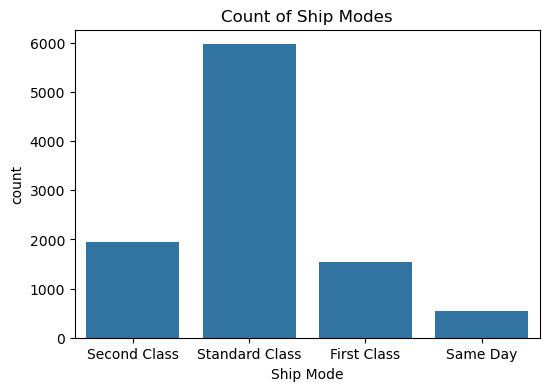

In [127]:
plt.figure(figsize=(6,4)) # To make graph smaller
sns.countplot(x="Ship Mode", data= storedata)
plt.title("Count of Ship Modes")
file_path = r'C:\Users\IbrahimSarwar\Documents\my_plot.jpg'
plt.savefig(file_path)
#plt.show()

# To show this data in a pie chart

In [158]:
# To specify the names and values to be shown in the pie chart
x = storedata["Ship Mode"].value_counts().index
y = storedata["Ship Mode"].value_counts().values


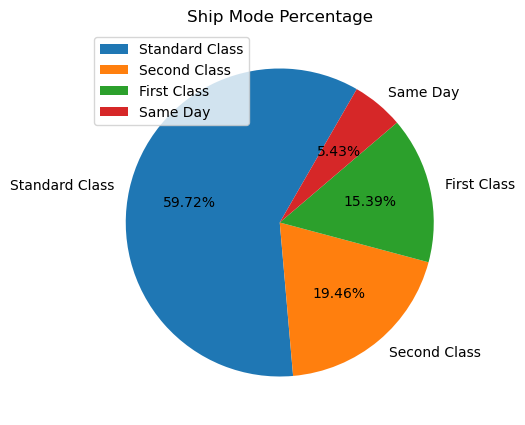

In [186]:
plt.figure(figsize=(6,5))
plt.title("Ship Mode Percentage")
plt.pie(y, labels=x, startangle=60, autopct="%0.2f%%")
plt.legend(loc=2)

In [97]:
storedata["City"].value_counts()

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

# To show 2 column data in a graph

Text(0.5, 1.0, 'Count of Ship Modes according to regions')

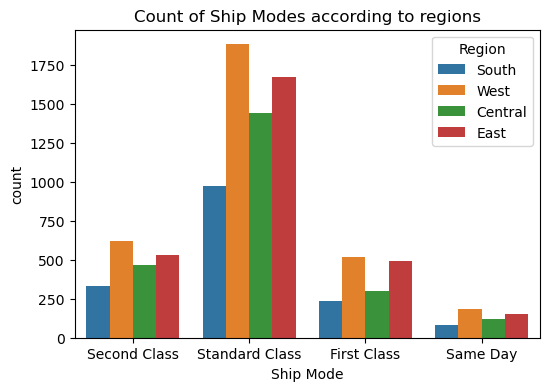

In [195]:
plt.figure(figsize=(6,4)) # To make graph smaller
sns.countplot(x="Ship Mode", data= storedata, hue="Region")
plt.title("Count of Ship Modes according to regions")


# Check which year has the max sales

In [231]:
# Create a new column order year from existing column order date
storedata["Order Year"] = storedata["Order Date"].dt.year
# Check which year has the max sales
sales_by_year = storedata.groupby('Order Year')['Sales'].sum() #shows all the sales in each year
# Shows the year with max sales
max_sales_year = sales_by_year.idxmax()

#Shows the total amount in that year
max_sales = sales_by_year.max()
print(f"The year with the max sales is : {max_sales_year}, and the sales is : {max_sales}")


The year with the max sales is : 2017, and the sales is : 733215.2552


# To show the sales in each year graphically

Text(0, 0.5, 'Total Sales')

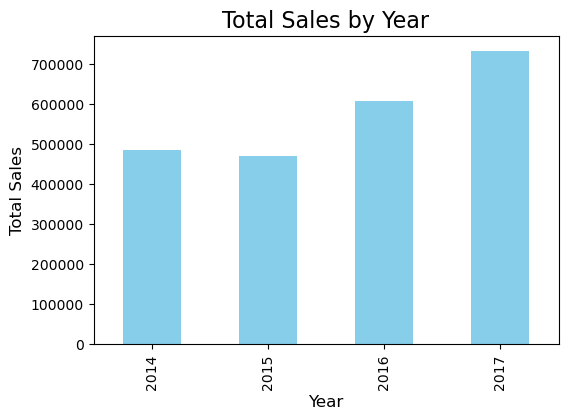

In [235]:
plt.figure(figsize=(6,4)) # To make graph smaller
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# To show the sales of each category

In [241]:
# Check which category has the max sales
sales_by_category = storedata.groupby('Category')['Sales'].sum() #shows all the sales in each year
# Shows the category with max sales
max_sales_category = sales_by_category.idxmax()

#Shows the total amount in that year
max_sales = sales_by_category.max()
print(f"The category with the max sales is : {max_sales_category}, and the sales is : {max_sales}")

The category with the max sales is : Technology, and the sales is : 836154.033


Text(0.5, 1.0, 'Total Sales by Category')

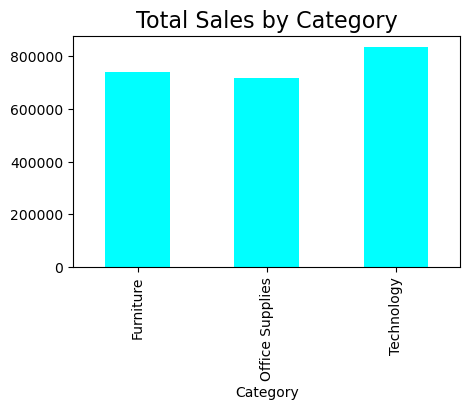

In [253]:
plt.figure(figsize=(5,3)) # To make graph smaller
sales_by_category.plot(kind='bar', color='aqua')
plt.title('Total Sales by Category', fontsize=16)
#plt.xlabel('Category', fontsize=10)
#plt.ylabel('Total Sales', fontsize=12)